In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#data_2013 = pd.read_csv('NIJ2013_JAN01_DEC31.xlsx')
#data_2014 = pd.read_csv ('NIJ2014_JAN01_DEC31.xlsx')
#data_2015 = pd.read_csv('NIJ2015_JAN01_DEC31.xlsx')

with open('NIJ2013_JAN01_DEC31.xlsx', 'rb') as file: content = file.read().decode('utf-8', errors='replace')
with open('NIJ2014_JAN01_DEC31.xlsx', 'rb') as file: content = file.read().decode('utf-8', errors='replace')
with open('NIJ2015_JAN01_DEC31.xlsx', 'rb') as file: content = file.read().decode('utf-8', errors='replace')

In [3]:
# Replace 'MembershipProduct_q1-2019-2023.xlsx' with the actual path to your Excel file
path1 = 'NIJ2013_JAN01_DEC31.xlsx'
path2 = 'NIJ2014_JAN01_DEC31.xlsx'
path3 = 'NIJ2015_JAN01_DEC31.xlsx'
# Read the Excel file using pandas
df1 = pd.read_excel(path1)
df2 = pd.read_excel(path2)
df3 = pd.read_excel(path3)

In [4]:
#Concatenating databases vertically
df = pd.concat([df1, df2, df3], ignore_index=True)
df.shape

(571053, 8)

In [5]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to 'CATEGORY' and 'CALL GROUPS'
df['CATEGORY'] = label_encoder.fit_transform(df['CATEGORY'])
df['CALL GROUPS'] = label_encoder.fit_transform(df['CALL GROUPS'])

In [6]:
# Finding duplicated rows
df.duplicated().sum()

7890

In [7]:
# Removing duplicated rows
df.drop_duplicates(inplace = True)
df.shape

(563163, 8)

In [8]:
# Removing some specific columns
columns_to_remove = ['final_case_type', 'CASE DESC']

df.drop(columns=columns_to_remove, inplace = True)

In [9]:
#Converting occ_date to datetime
df['occ_date'] = pd.to_datetime(df['occ_date'])

In [10]:
print(df.dtypes)

CATEGORY                 int64
CALL GROUPS              int64
occ_date        datetime64[ns]
x_coordinate             int64
y_coordinate             int64
census_tract           float64
dtype: object


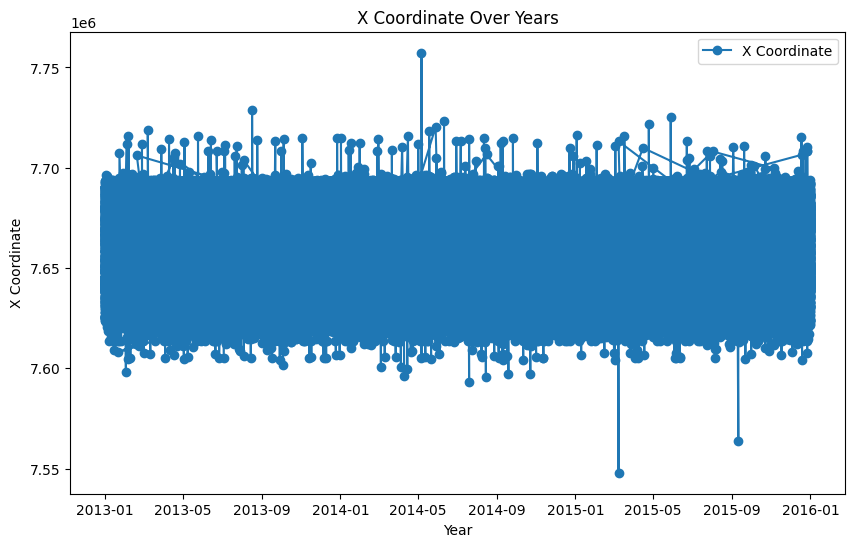

In [26]:
# Line graph for x_coordinate over years
plt.figure(figsize=(10, 6))
plt.plot(df['x_coordinate'], marker='o', label='X Coordinate')
plt.title('X Coordinate Over Years')
plt.xlabel('Year')
plt.ylabel('X Coordinate')
plt.legend()
plt.show()

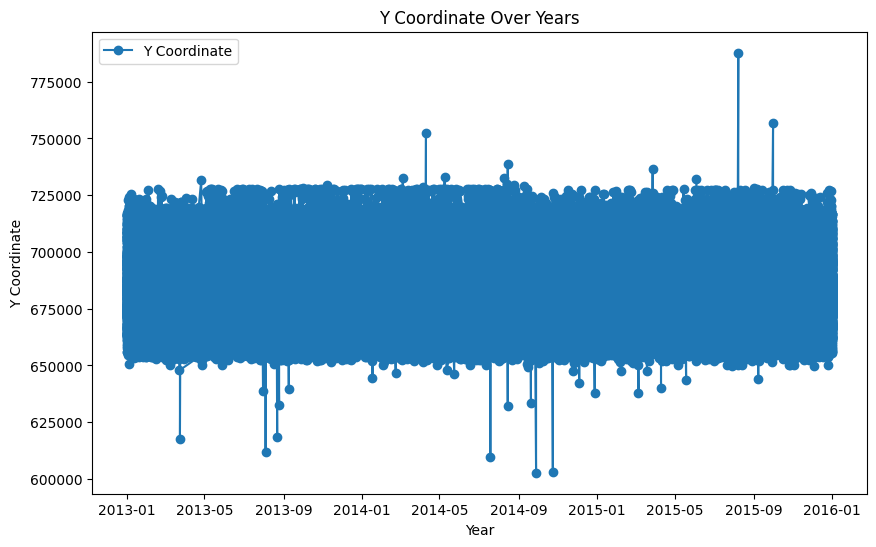

In [25]:
# Line graph for y_coordinate over years
plt.figure(figsize=(10, 6))
plt.plot(df['y_coordinate'], marker='o', label='Y Coordinate')
plt.title('Y Coordinate Over Years')
plt.xlabel('Year')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()

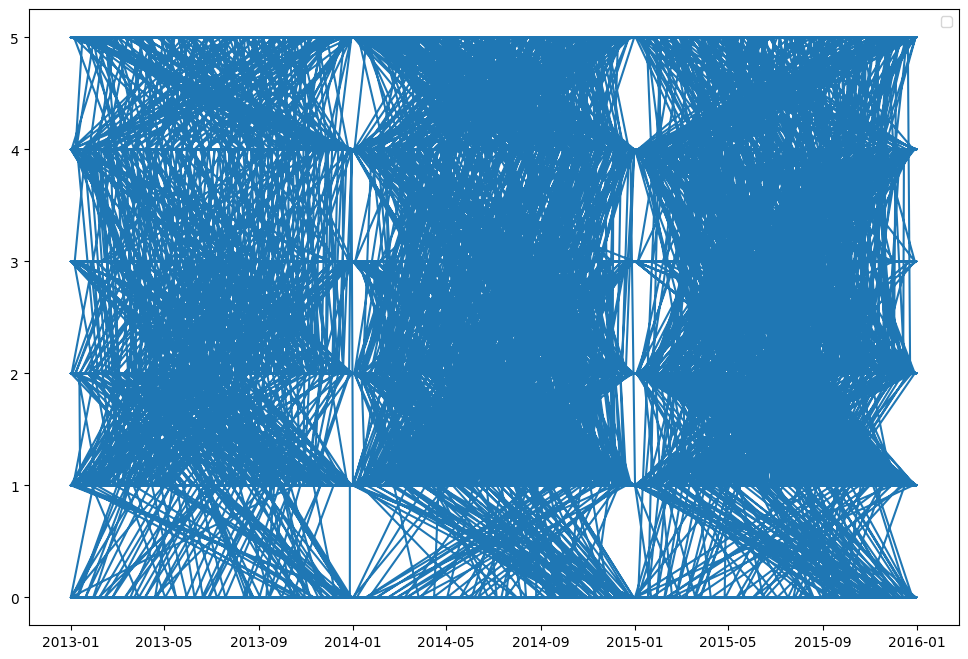

In [22]:
# # Line graph for CALL GROUPS over years
plt.figure(figsize=(12, 8))
plt.plot(df['CALL GROUPS'])
plt.legend()
plt.show()

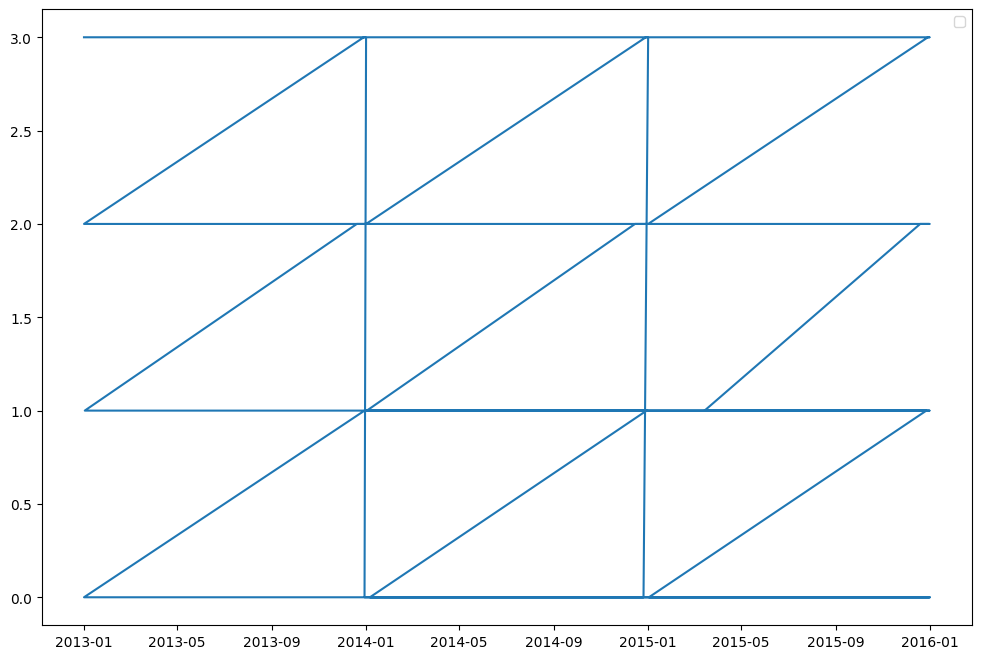

In [29]:
# # Line graph for CATEGORY over years
plt.figure(figsize=(12, 8))
plt.plot(df['CATEGORY'])
plt.legend()
plt.show()